In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Функция приспособленности:

In [2]:
def fitness(chromosome):
    y = network[departure][chromosome[0]]
    y += network[destination][chromosome[-1]]
    for i in range(1, len(chromosome)):
        y += network[chromosome[i-1]][chromosome[i]]
    return y

Селекция:

In [3]:
def selection(population):
    return sorted(population, key=lambda x:fitness(x))[:population_size//2]

Скрещивание:

In [4]:
def crossover(parent1, parent2, k=2):
    child1 = parent2[:]
    child2 = parent1[:]
    for i in range(k):
        tmp = np.random.randint(1, len(child1)-1)
        for i in range(tmp):
            child1[i] = parent1[i]
            child2[i] = parent2[i]
    return child1, child2

Мутация:

In [5]:
def mutation(chromosome, prob=0.01):
    for i in range(len(chromosome)):
        if np.random.random() < prob:
            mut_gen = chromosome[i]
            while chromosome[i] == mut_gen:
                mut_gen = np.random.randint(n_computers)
            chromosome[i] = mut_gen
    return chromosome

Исходные данные:

In [6]:
departure = 0
destination = 9
n_computers = 10
population_size = 100
n_generations = 50
mutation_probability = 0.01

user_network = [[0,                110, 78, 71, 67, 139, 29, 234, 65, 1000],
               [0,0,               155, 72, 1000, 87, 1000, 1000, 72, 1000],
               [0,0,0,             1000, 1000, 1000, 1000, 1000, 1000, 51],
               [0,0,0,0,           345,   58, 1000,   90,  145, 1000],
               [0,0,0,0,0,         1000,    4, 1000,   32,  160],
               [0,0,0,0,0,0,       1000, 1000, 1000,   87],
               [0,0,0,0,0,0,0,     1000,   67, 1000],
               [0,0,0,0,0,0,0,0,   140,  159],
               [0,0,0,0,0,0,0,0,0, 87],
               [0,0,0,0,0,0,0,0,0,0,0]]

Построение топологии сети (пропускные способности каналов связи):

In [7]:
def build_network():
    network = []
    for i in range(n_computers):
        network.append([])
        for j in range(n_computers):
            network[i].append(0)
    for i in range(n_computers):
        for j in range(i+1, n_computers):
            network[i][j] = np.random.randint(200)
    for i in range(n_computers):
        for j in range(i):
            network[i][j] = network[j][i]
    for i in range(len(network)):
        for j in range(len(network[i])):
            if network[i][j] >= 100:
                network[i][j] = 1000
                network[j][i] = 1000
    return network

Начальная популяция:

In [8]:
def initial_population():
    chromosomes = []
    for k in range(population_size):
        chromosomes.append([])
        for i in range(n_computers-2):
            chromosomes[k].append(np.random.randint(n_computers))
    return chromosomes

Пропускные способности каналов связи:

In [9]:
network = build_network()
network

[[0, 47, 50, 1000, 92, 1000, 1000, 1000, 1000, 82],
 [47, 0, 77, 1000, 85, 69, 1000, 1000, 14, 1000],
 [50, 77, 0, 1000, 1000, 61, 1000, 1000, 23, 1000],
 [1000, 1000, 1000, 0, 1000, 80, 1000, 41, 1000, 1000],
 [92, 85, 1000, 1000, 0, 1000, 1000, 1000, 1000, 53],
 [1000, 69, 61, 80, 1000, 0, 65, 1000, 1000, 1000],
 [1000, 1000, 1000, 1000, 1000, 65, 0, 1000, 94, 80],
 [1000, 1000, 1000, 41, 1000, 1000, 1000, 0, 48, 80],
 [1000, 14, 23, 1000, 1000, 1000, 94, 48, 0, 56],
 [82, 1000, 1000, 1000, 53, 1000, 80, 80, 56, 0]]

Генетический алгоритм:


	Эксперимент:  1
Поколение 0 Лучший представитель [6, 8, 2, 8, 2, 0, 9, 7] Результат 1455
Поколение 50 Лучший представитель [1, 8, 8, 8, 8, 8, 8, 8] Результат 117

	Эксперимент:  2
Поколение 0 Лучший представитель [1, 5, 5, 1, 1, 5, 8, 9] Результат 1310
Поколение 50 Лучший представитель [0, 0, 2, 2, 8, 8, 8, 9] Результат 129

	Эксперимент:  3
Поколение 0 Лучший представитель [0, 2, 8, 1, 5, 0, 2, 8] Результат 1285
Поколение 50 Лучший представитель [0, 2, 2, 2, 2, 2, 2, 8] Результат 129

	Эксперимент:  4
Поколение 0 Лучший представитель [1, 8, 2, 2, 5, 5, 9, 0] Результат 1309
Поколение 50 Лучший представитель [0, 1, 1, 8, 8, 8, 8, 8] Результат 117

	Эксперимент:  5
Поколение 0 Лучший представитель [1, 5, 2, 0, 2, 8, 9, 9] Результат 356
Поколение 50 Лучший представитель [1, 1, 1, 1, 8, 8, 9, 9] Результат 117

	Эксперимент:  6
Поколение 0 Лучший представитель [2, 8, 8, 9, 8, 1, 4, 4] Результат 337
Поколение 50 Лучший представитель [0, 0, 0, 1, 8, 9, 9, 9] Результат 117

	Эксперимент:  7


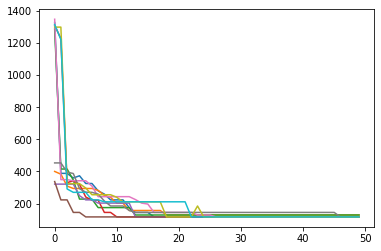

In [10]:
for i in range(10):
    print('\n\tЭксперимент: ', i+1)
    chromosomes = initial_population()
    best_start = min(chromosomes, key=lambda chromosome: fitness(chromosome))
    print('Поколение 0 Лучший представитель {} Результат {}'.format(best_start, fitness(best_start)))
    res = []
    log = []
    for k in range(n_generations):
        selected = selection(chromosomes)

        for i in range((population_size-len(selected))//2):
            parents = random.sample(selected, 2)
            child1, child2 = crossover(parents[0], parents[1])
            selected.append(child1)
            selected.append(child2)

        for i in range(len(selected)):
            selected[i] = mutation(selected[i])

        chromosomes = selected

        best_chromosome = min(chromosomes, key=lambda chromosome: fitness(chromosome))
        log.append(fitness(best_chromosome))
        #print('Поколение {} Лучший представитель {} Результат {}'.format(k, best_chromosome, fitness(best_chromosome)))
        res.append(best_chromosome)
    plt.plot(log)
    best_exp = min(res, key=lambda chromosome: fitness(chromosome))
    print('Поколение {} Лучший представитель {} Результат {}'.format(n_generations, best_exp, fitness(best_exp)))